<a href="https://colab.research.google.com/github/Ankithraj07/Ankith-Raj/blob/main/Assignment_ankit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/logpai/loghub/master/HealthApp/HealthApp_2k.log
!wget https://raw.githubusercontent.com/logpai/loghub/master/HealthApp/HealthApp_2k.log_structured.csv
!wget https://raw.githubusercontent.com/logpai/loghub/master/HealthApp/HealthApp_2k.log_templates.csv


--2023-10-22 15:31:02--  https://raw.githubusercontent.com/logpai/loghub/master/HealthApp/HealthApp_2k.log
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 187456 (183K) [text/plain]
Saving to: ‘HealthApp_2k.log’

HealthApp_2k.log    100%[===================>] 183.06K  --.-KB/s    in 0.04s   

2023-10-22 15:31:03 (4.81 MB/s) - ‘HealthApp_2k.log’ saved [187456/187456]

--2023-10-22 15:31:03--  https://raw.githubusercontent.com/logpai/loghub/master/HealthApp/HealthApp_2k.log_structured.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Leng

In [ ]:
import pandas as pd

# Loading datasets into DataFrames
structured_data = pd.read_csv('HealthApp_2k.log_structured.csv')
templates_data = pd.read_csv('HealthApp_2k.log_templates.csv')
with open('HealthApp_2k.log', 'r') as file:
    log_data = file.readlines()


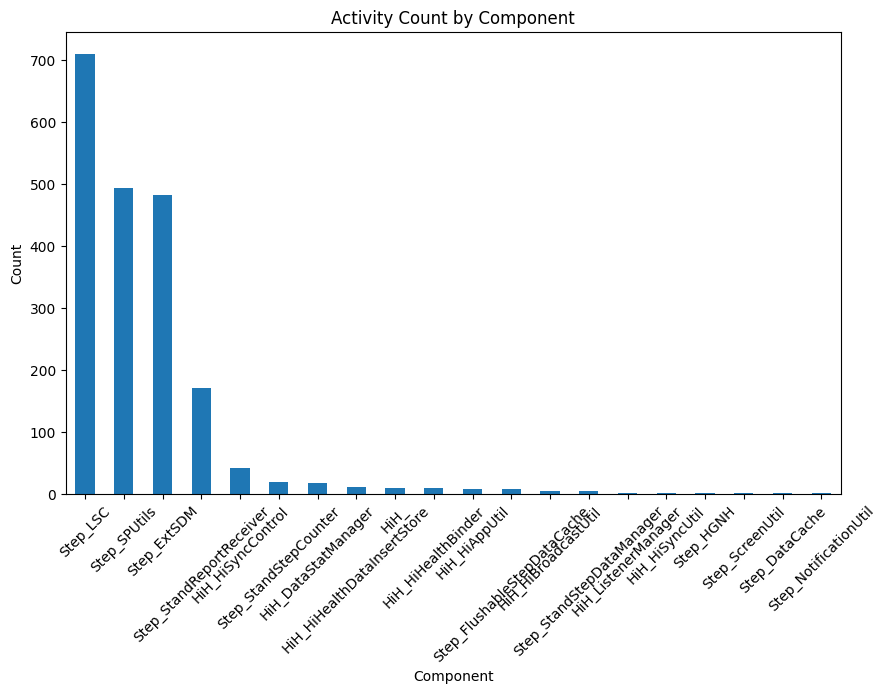

In [ ]:
import matplotlib.pyplot as plt

component_counts = structured_data['Component'].value_counts()

plt.figure(figsize=(10,6))
component_counts.plot(kind='bar')
plt.title('Activity Count by Component')
plt.xlabel('Component')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


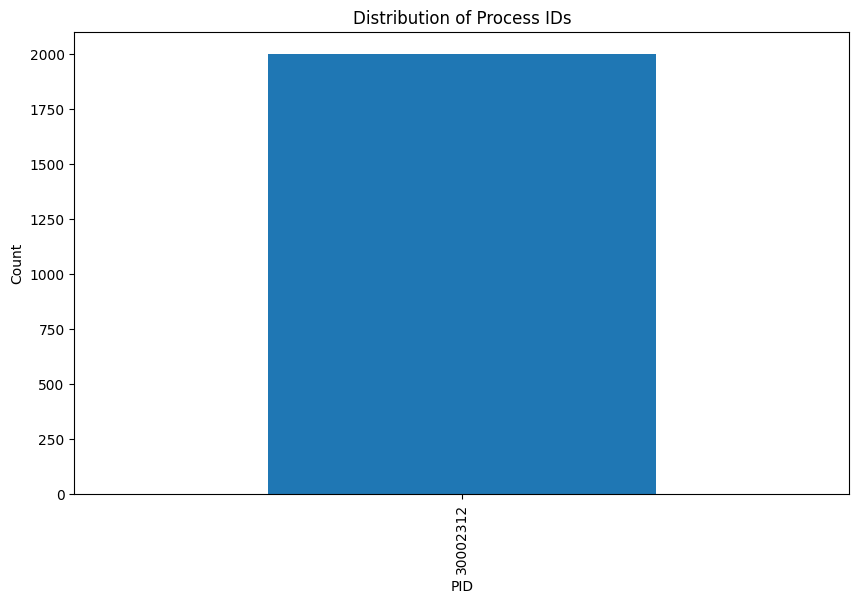

In [ ]:
pid_counts = structured_data['Pid'].value_counts()

plt.figure(figsize=(10,6))
pid_counts.plot(kind='bar')
plt.title('Distribution of Process IDs')
plt.xlabel('PID')
plt.ylabel('Count')
plt.show()


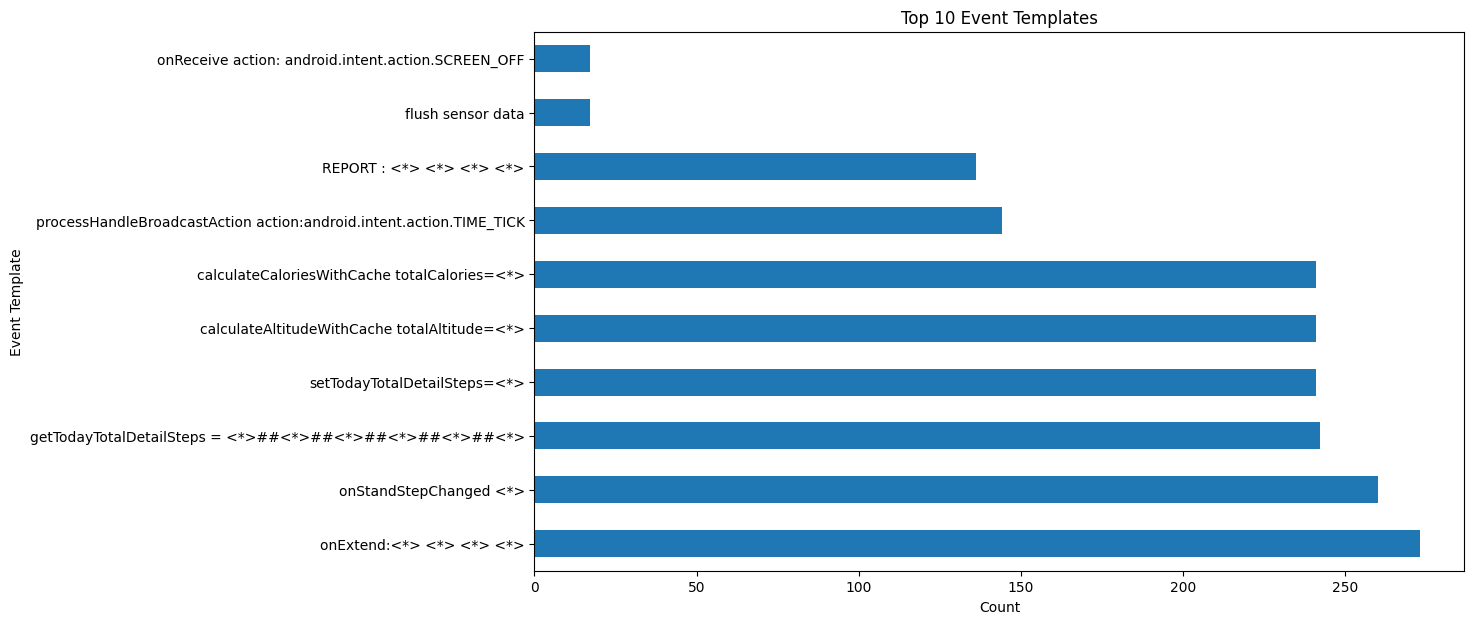

In [ ]:
event_template_counts = structured_data['EventTemplate'].value_counts().head(10)

plt.figure(figsize=(12,7))
event_template_counts.plot(kind='barh')
plt.title('Top 10 Event Templates')
plt.xlabel('Count')
plt.ylabel('Event Template')
plt.show()


In [ ]:
# Converting 'Time' to datetime format
structured_data['Time'] = pd.to_datetime(structured_data['Time'])

# Grouping by date
date_counts = structured_data.groupby(structured_data['Time'].dt.date).size()

plt.figure(figsize=(12,7))
date_counts.plot()
plt.title('Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Log Entries')
plt.show()


ParserError: ignored

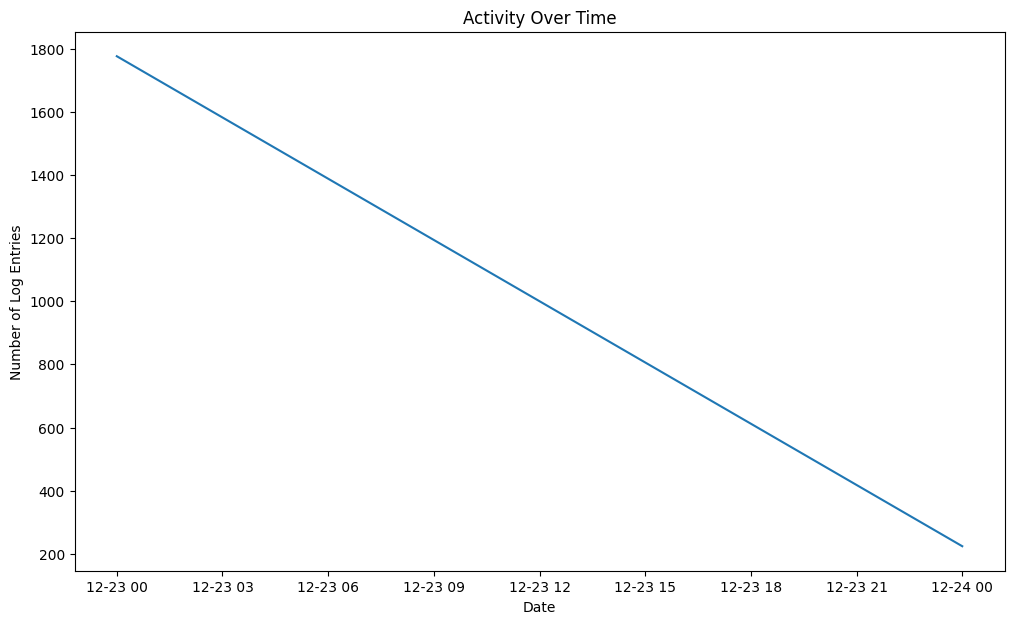

In [ ]:
# Format string: YYYYMMDD-HH:MM:SS:fff
date_format = "%Y%m%d-%H:%M:%S:%f"

# Attempting to convert 'Time' to datetime format using the specified format
try:
    structured_data['Time'] = pd.to_datetime(structured_data['Time'], format=date_format)
except Exception as e:
    print("Error converting 'Time':", e)
    print("Inspect the format and adjust accordingly.")

# If successful, plot activity over time
if 'Time' in structured_data.columns and structured_data['Time'].dtype == 'datetime64[ns]':
    # Grouping by date
    date_counts = structured_data.groupby(structured_data['Time'].dt.date).size()

    plt.figure(figsize=(12,7))
    date_counts.plot()
    plt.title('Activity Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Log Entries')
    plt.show()
else:
    print("Conversion of 'Time' to datetime was not successful.")


In [ ]:
print(structured_data['EventTemplate'].unique())


['onStandStepChanged <*>' 'onExtend:<*> <*> <*> <*>'
 'onReceive action: android.intent.action.SCREEN_ON'
 'processHandleBroadcastAction action:android.intent.action.SCREEN_ON'
 'flush sensor data'
 'getTodayTotalDetailSteps = <*>##<*>##<*>##<*>##<*>##<*>'
 'setTodayTotalDetailSteps=<*>'
 'calculateCaloriesWithCache totalCalories=<*>'
 'calculateAltitudeWithCache totalAltitude=<*>' 'REPORT : <*> <*> <*> <*>'
 'onReceive action: android.intent.action.SCREEN_OFF' 'isScreenOn true'
 'screen status unknown,think screen on'
 'processHandleBroadcastAction action:android.intent.action.TIME_TICK'
 'flushTempCacheToDB by stand'
 'Alarm uploadStaticsToDB totalSteps=<*>:<*>:<*>:<*>'
 'writeDataToDB size <*>'
 'upLoadOneMinuteDataToEngine time=<*>,<*>,<*>,<*>,<*>'
 'getBinderPackageName packageName = com.huawei.health'
 'getAppContext() isAppValid health or wear, packageName = <*>'
 'insertHiHealthData() checkAppType  <*> appID = <*>'
 'insertHiHealthData() size = <*>,app = <*>,One Data Type = <*>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming structured_data is the dataframe you have loaded with the log data

# 1. Identify potential workouts in EventTemplate column
keywords = ["workout", "exercise", "running", "activity"]  # This list can be expanded based on your dataset's unique values
workout_data = structured_data[structured_data['EventTemplate'].str.contains('|'.join(keywords), case=False, na=False)]

# 2. Group and count the workout occurrences by hour
hourly_counts = workout_data.groupby(workout_data['Time'].dt.hour).size()

# 3. Handle the case where there are no workouts found
if not hourly_counts.empty:
    plt.figure(figsize=(12,7))
    hourly_counts.plot(kind='bar')
    plt.title('Workout Activities by Hour of Day')
    plt.xlabel('Hour of Day (24-hour format)')
    plt.ylabel('Number of Workout Entries')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("No workout activities found based on the provided keywords.")


No workout activities found based on the provided keywords.


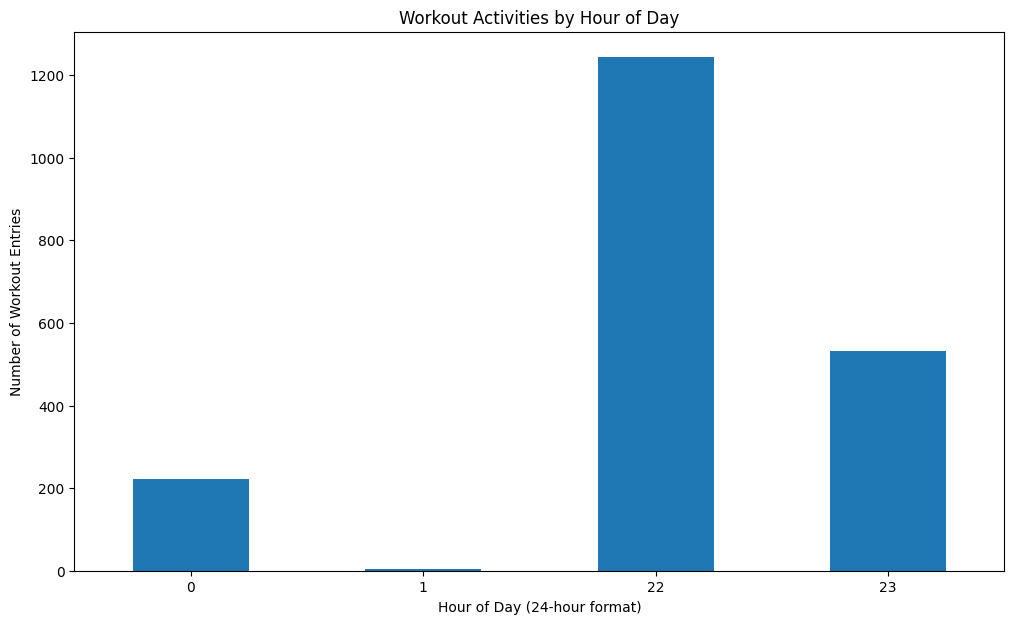

In [ ]:
# Replace with new keywords based on your observations
new_keywords = ["YOUR_NEW_KEYWORD_1", "YOUR_NEW_KEYWORD_2", "..."]
workout_data = structured_data[structured_data['EventTemplate'].str.contains('|'.join(new_keywords), case=False, na=False)]

# Group by hour and plot
hourly_counts = workout_data.groupby(workout_data['Time'].dt.hour).size()

if not hourly_counts.empty:
    plt.figure(figsize=(12,7))
    hourly_counts.plot(kind='bar')
    plt.title('Workout Activities by Hour of Day')
    plt.xlabel('Hour of Day (24-hour format)')
    plt.ylabel('Number of Workout Entries')
    plt.xticks(rotation=0)
    plt.show()
else:
    print("No workout activities found based on the newly provided keywords.")


<ipython-input-28-478a681cd850>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  step_data['Steps'] = step_data['Content'].str.extract('(\d+)').astype(float)  # extracts numbers from the 'Content' column
<ipython-input-28-478a681cd850>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  step_data['Time'] = pd.to_datetime(step_data['Time'], errors='coerce')


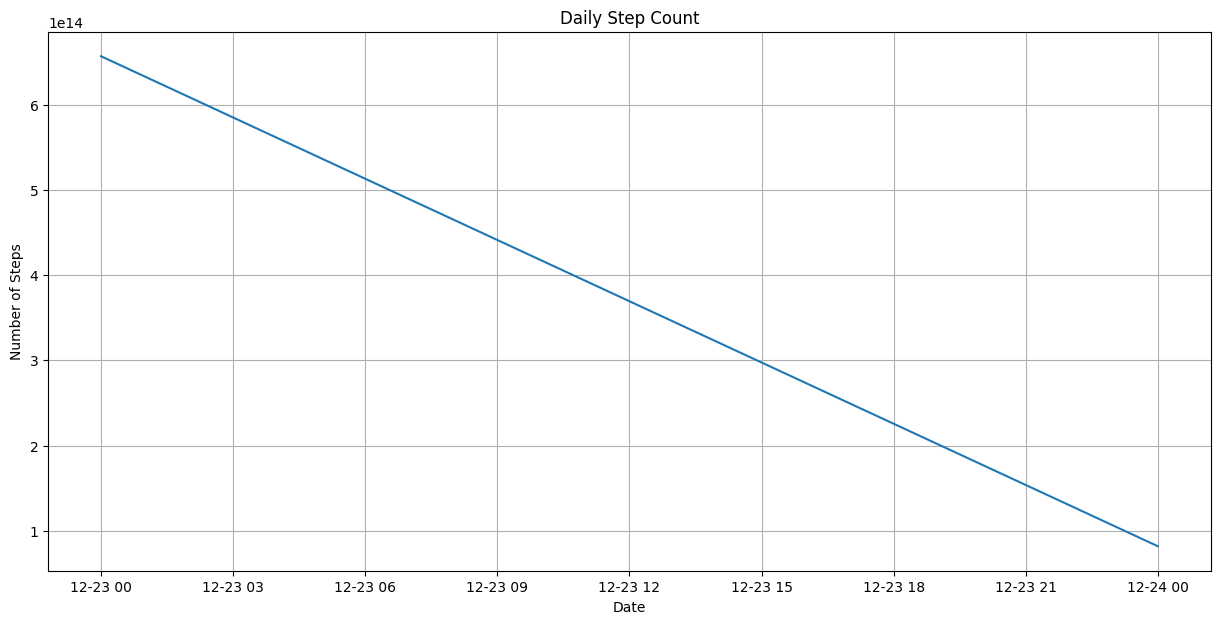

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming structured_data is the dataframe you've loaded with the log data

# 1. Filter for entries related to steps
# This step may require adjustments based on the actual content of the logs.
step_data = structured_data[structured_data['Content'].str.contains('steps', case=False, na=False)]

# Extract the number of steps from the 'Content' column.
step_data['Steps'] = step_data['Content'].str.extract('(\d+)').astype(float)  # extracts numbers from the 'Content' column

# 2. Convert the 'Time' column to datetime format
step_data['Time'] = pd.to_datetime(step_data['Time'], errors='coerce')

# 3. Group by day and sum the step counts
daily_steps = step_data.groupby(step_data['Time'].dt.date)['Steps'].sum()

# 4. Plot the results
plt.figure(figsize=(15,7))
daily_steps.plot(kind='line')
plt.title('Daily Step Count')
plt.xlabel('Date')
plt.ylabel('Number of Steps')
plt.grid(True)
plt.show()


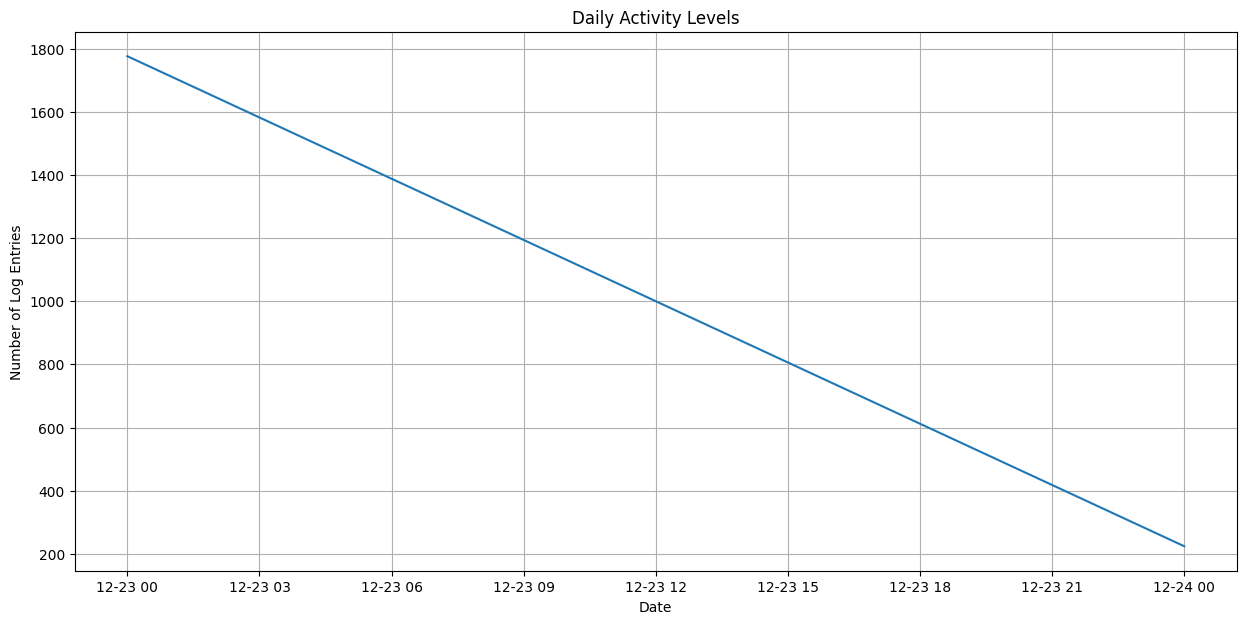

In [ ]:
structured_data['Time'] = pd.to_datetime(structured_data['Time'], errors='coerce')
daily_activity = structured_data.groupby(structured_data['Time'].dt.date).size()

plt.figure(figsize=(15,7))
daily_activity.plot(kind='line')
plt.title('Daily Activity Levels')
plt.xlabel('Date')
plt.ylabel('Number of Log Entries')
plt.grid(True)
plt.show()

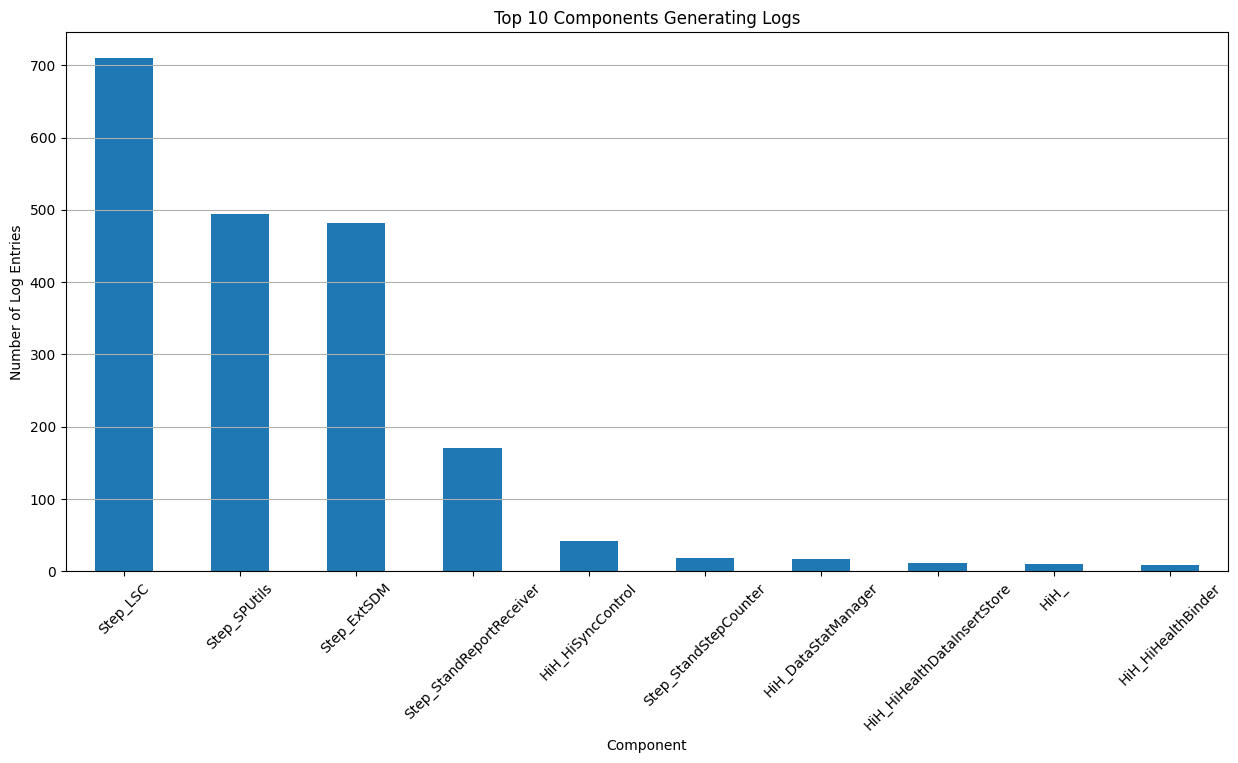

In [ ]:
top_components = structured_data['Component'].value_counts().head(10)

plt.figure(figsize=(15,7))
top_components.plot(kind='bar')
plt.title('Top 10 Components Generating Logs')
plt.xlabel('Component')
plt.ylabel('Number of Log Entries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

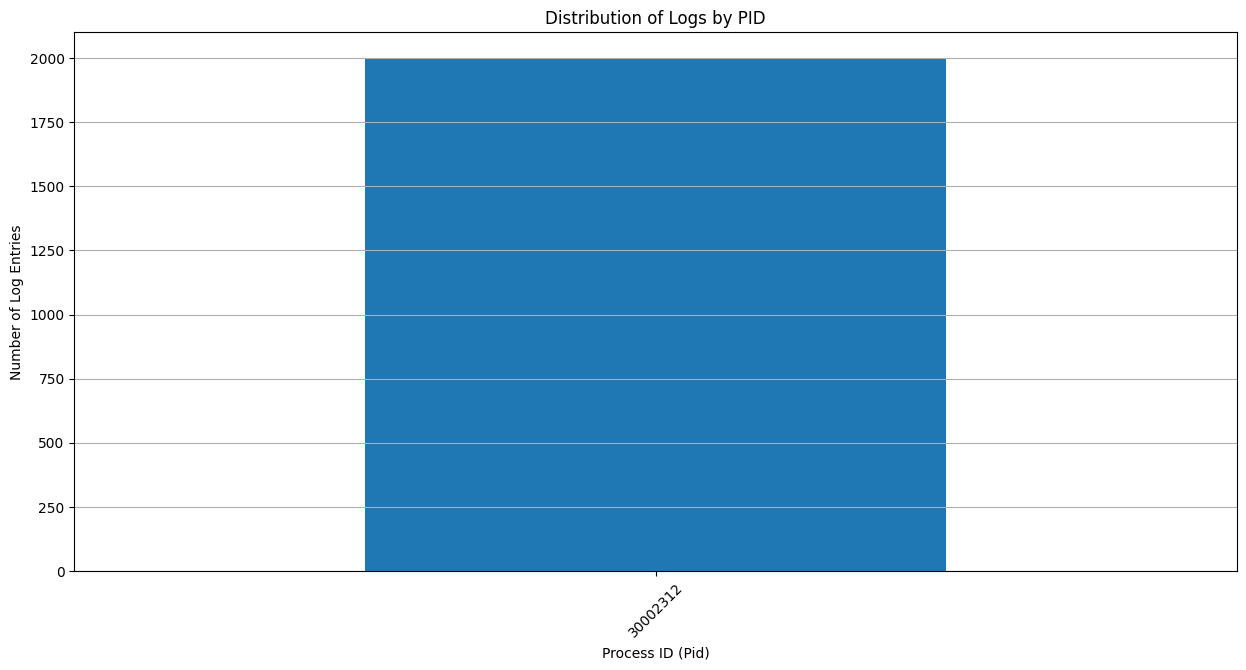

In [ ]:
pid_distribution = structured_data['Pid'].value_counts()

plt.figure(figsize=(15,7))
pid_distribution.plot(kind='bar')
plt.title('Distribution of Logs by PID')
plt.xlabel('Process ID (Pid)')
plt.ylabel('Number of Log Entries')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()